<a href="https://colab.research.google.com/github/adilimam12/unsupervised_learning_capstone-project4/blob/main/online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online retail customer segmentation**

Unsupervised learning project

---

Team curio monks

Adil imam

#**Github links**

---

Adil imam



**Project summary**

---



# Problem Description

---

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Business Objective:**
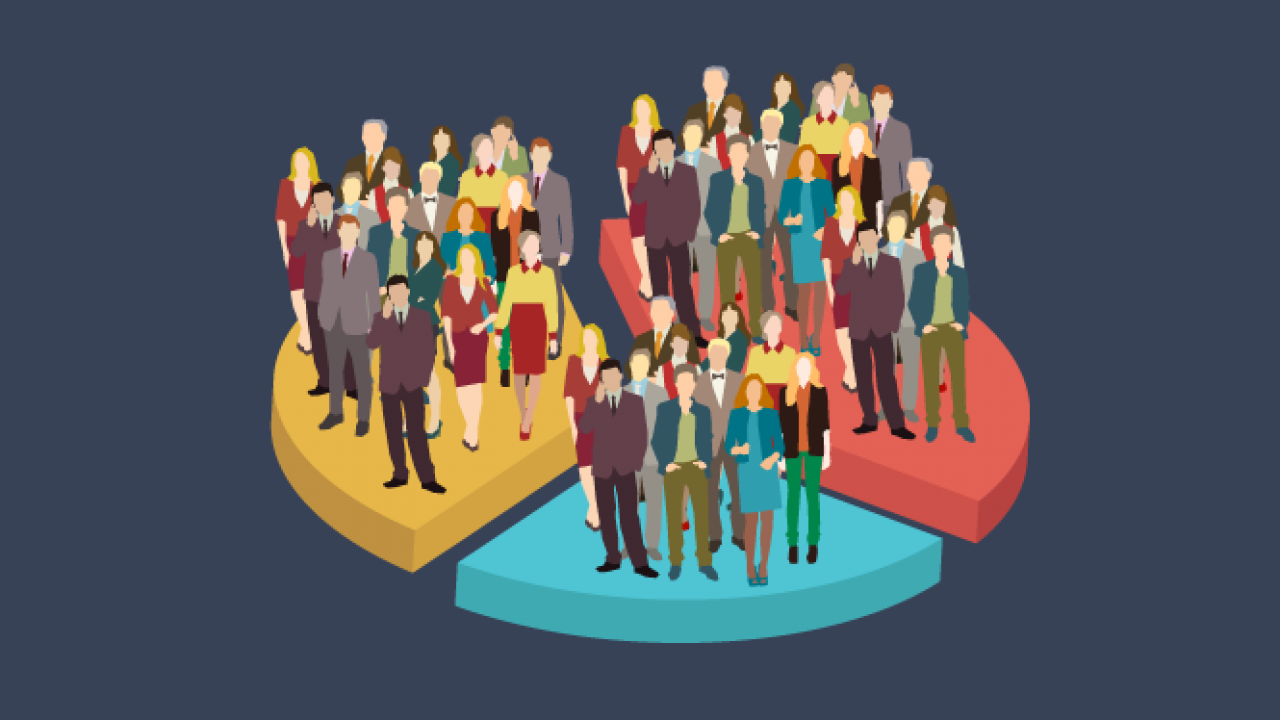

Customer segmentation is the practice of grouping the consumers of a firm into categories that represent the similarities among the customers in each category. In order to optimize each customer's value to the company, it is important to segment customers in order to determine how to interact with them.
Customer segmentation may enable marketers to reach out to each customer in the most efficient manner. A customer segmentation analysis enables marketers to accurately identify distinct groups of customers based on demographic, behavioral, and other factors by utilizing the vast amount of customer (and potential customer) data accessible.

***Importing Libraries***

---



In [1]:
 #Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Model Building Prerequisits
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#To getSilhouette Visualization
from yellowbrick.cluster import SilhouetteVisualizer

#Models used
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#To get clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

#Supress future warnings
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
retail_data=pd.read_csv('/content/drive/MyDrive/almabetter/capstone 4/Online Retail.csv')

**Some insights of the data**

---



In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


*This Dataset contains features like *

---
InvoiceNo: Invoice number. Nominal, a six-digit integral number assigned to each transaction specifically. This code denotes a cancellation if it begins with the letter "c.".

StockCode: Product (item) code. A 5-digit integral number known as the nominal is assigned to each unique product.

Description: Name of the Product (Item). Nominal.

Quantity: The number of each item (product) in each transaction. Numeric.

InvoiceDate: Invoice Time and date. The day and time that each transaction was created, represented by a number.

UnitPrice: Unit pricing. Numeric, Sterling unit price for the product.

CustomerID: Customer number. Nominal, a five-digit integral number assigned to every customer uniquely.

Country: Country name. Nominal, the name of the country in which each customer resides.


**Exploring the dataframe**

In [5]:
#getting the shape of the data
retail_data.shape

(541909, 8)

No of rows 541909

No of columns 8

---



*let's look for all the features present in our dataset*

In [6]:
#checking all the columns
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#datatype of the column
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are 3 numerical, 1 Date-Time and 4 catagorical features present in our dataset.

In [8]:
# Check the unique values
retail_data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Most no of unique values are in InvoiceNo 25900 followed by InvoiceDate 23260



In [9]:
#checking the statistical details of all features
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
#looking for duplicates
retail_data.duplicated().sum()

5268

There are 5268 duplicate values present in our dataset

*Let's check null values*

---







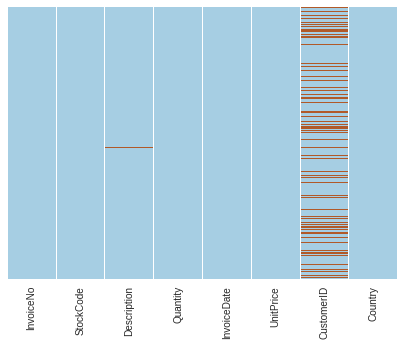

In [11]:
# check for Null values
plt.rcParams['figure.figsize'] = (7, 5)
sns.heatmap(retail_data.isnull(), cbar=False,yticklabels=False,cmap='Paired')


'CustomerID' column seems to contain a lot of missing values. Let's check how much of these constitute in our data

In [12]:
#Checking percentage of missing values in our data.
print(round(retail_data[['CustomerID', 'Description']].isnull().sum()/len(retail_data)*100,2))

CustomerID     24.93
Description     0.27
dtype: float64


Missing value treatment

The observations suggest that about 25% of data does not have a CustomerID.
Which means these purchases haven't been assigned to any customer.
We must remove these observations as these do not help us in forming clusters, as these can't be related to a CustomerID.
We can also remove missing values from the 'Description' feature.

#Data Cleaning

In [13]:
#dropping null values
retail_data.dropna(inplace=True)

In [14]:
# Information about the dataset after drop the null values:
retail_data.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


After removing all the null values the observation in our dataset reduces to (406829, 8).

*Duplicate values treatment*

---



In [15]:
#Dropping duplicate observations
retail_data.drop_duplicates(inplace=True)

In [16]:
#checking the shape after dropping the duplicate
retail_data.shape

(401604, 8)

After removing the duplicate values the shape of the dataset changes to(401604, 8)

As given in the data dictionary, some values in 'InvoiceNo' column contain observations beginning with 'c'

"If this code (InvoiceNo) starts with letter 'c', it indicates a cancellation"

We will drop these rows.

In [17]:
#Converting 'InvoiceNo' to string
retail_data['InvoiceNo'] =retail_data['InvoiceNo'].astype('str')

In [18]:
#Viewing these observations
retail_data[retail_data['InvoiceNo'].str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [19]:
#Removing observations with InvoiceNo beginning with 'c'
retail_data = retail_data[~retail_data['InvoiceNo'].str.contains('C')]

In [20]:
#Dataset shape after removing observations with InvoiceNo beginning with 'c'
retail_data.shape

(392732, 8)

Our dataset no more contains any missing or duplicate values.
We are left with 392732 rows after cleaning the data.

# Feature Engineering

*Date time features*

---



In [21]:
from datetime import datetime

In [22]:
# Convert InvoiceDate columns into date time format:
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], infer_datetime_format=True)

In [23]:
#Extracting the Year
retail_data["Year"] = retail_data["InvoiceDate"].apply(lambda x: x.year)

#Extracting the Month Name
retail_data['Month'] =retail_data["InvoiceDate"].apply(lambda x: x.month_name())

#Extracting the Month Number
retail_data['MonthNum'] = retail_data["InvoiceDate"].apply(lambda x: x.month)

#Extracting the Day Name
retail_data['Day'] = retail_data["InvoiceDate"].apply(lambda x: x.day_name())

#Extracting the Day Number
retail_data["DayNum"]= retail_data["InvoiceDate"].apply(lambda x: x.day)

#Extracting the Hour
retail_data["Hour"] = retail_data["InvoiceDate"].apply(lambda x: x.hour)

#Extracting the Minute
retail_data["Minute"] = retail_data["InvoiceDate"].apply(lambda x: x.minute)

Now that we have extracted time features(Hour, Minute) we can divide these times of the day to get a catagorical feature called 'DayPart'.
'DayPart' gives us the part of the day(Morning, Afternoon, Evening) based on the hour of that day.

In [24]:
#Extracting 'DayPart' from 'Hour' feature
retail_data['DayPart'] =retail_data["Hour"].apply( lambda x : 'Morning' if 6<=x<=11 else ('Afternoon' if 12<=x<=17 else 'Evening'))  
                           

TotalAmount

'Quantity' feature gives us the quantity of product in one transaction
'UnitPrice' feature gives us the price of product per unit
We can multiply these values to get the total amount per transaction

In [25]:
#Extracting 'TotalAmount' feature from 'Quantity' and 'UnitPrice'
retail_data['TotalAmount']=retail_data['Quantity']*retail_data['UnitPrice']

In [26]:
#data overviewing afterfeature engineering
retail_data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthNum,Day,DayNum,Hour,Minute,DayPart,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,20.34


We have constructed 9 new features out of which 8 give us the information about the date and time saperately and 1 gives the total amount of transaction.

# **Exploratory Data Analysis**

---

***Description***


In [27]:
#plotting top5 products
prod_count=retail_data['Description'].value_counts().reset_index()
prod_count.rename(columns = {'index' : 'Description_Name'}, inplace = True)
prod_count.rename(columns={'Description':'count'},inplace=True)
prod_count.head(5)

,Description_Name,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


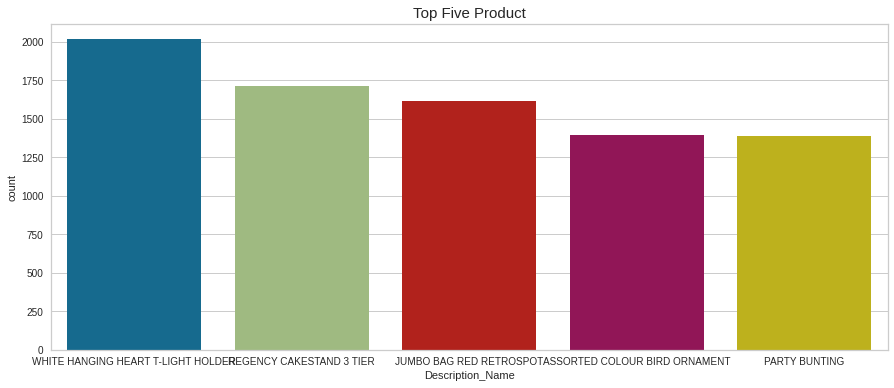

In [28]:
# Plotting top 5 product:
plt.figure(figsize=(15,6))
plt.title('Top Five Product', fontsize=15 )
sns.barplot(x='Description_Name', y='count', data = prod_count.head(5))

Top 5 product based on maximum selling are :

WHITE HANGING HEART T-LIGHT HOLDER,

REGENCY CAKESTAND 3 TIER

JUMBO BAG RED RETROSPOT

PARTY BUNTING

LUNCH BAG RED RETROSPOT

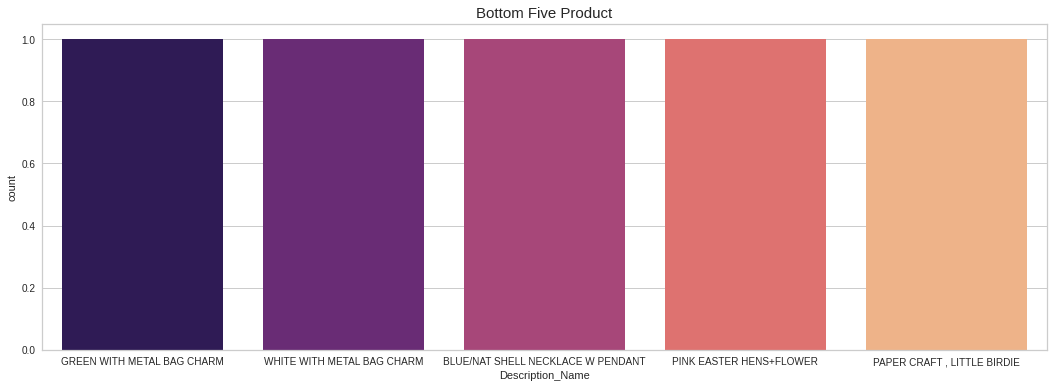

In [29]:
# Plotting bottom 5 product:
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product', fontsize=15)
sns.barplot(data = prod_count[-5:], x='Description_Name', y='count',palette ='magma')

Bottom 5 Product based on the selling are:

GREEN WITH METAL BAG CHARM

WHITE WITH METAL BAG CHARM

BLUE/NAT SHELL NECKLACE W PENDANT

PINK EASTER HENS+FLOWER


PAPER CRAFT , LITTLE BIRDIE

***Most Expensive and Cheapest Products per Unit***

---



In [30]:
#Creating a dataframe that gives the product names with their unit price
prod_price=retail_data.groupby('Description').sum()['UnitPrice'].reset_index().sort_values('UnitPrice',ascending=False)

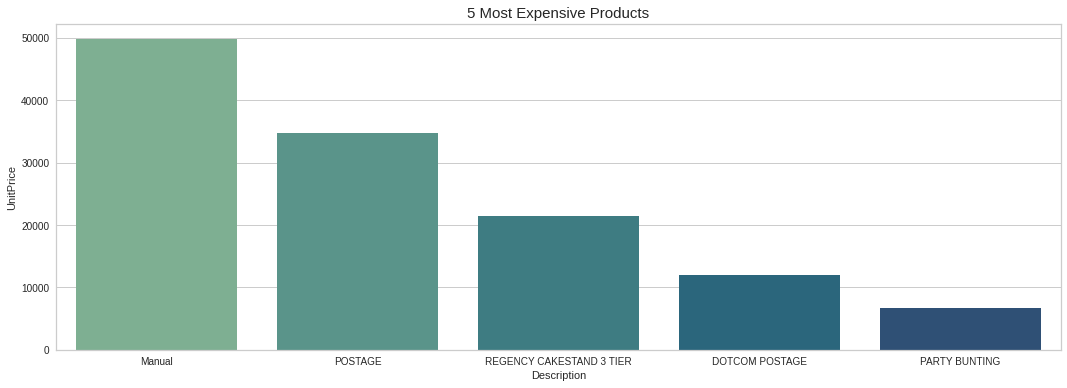

In [31]:
#Plotting Top 5
plt.figure(figsize=(18,6))
plt.title('5 Most Expensive Products', fontsize=15)
sns.barplot(data = prod_price[:5], x='Description', y='UnitPrice',palette ='crest')

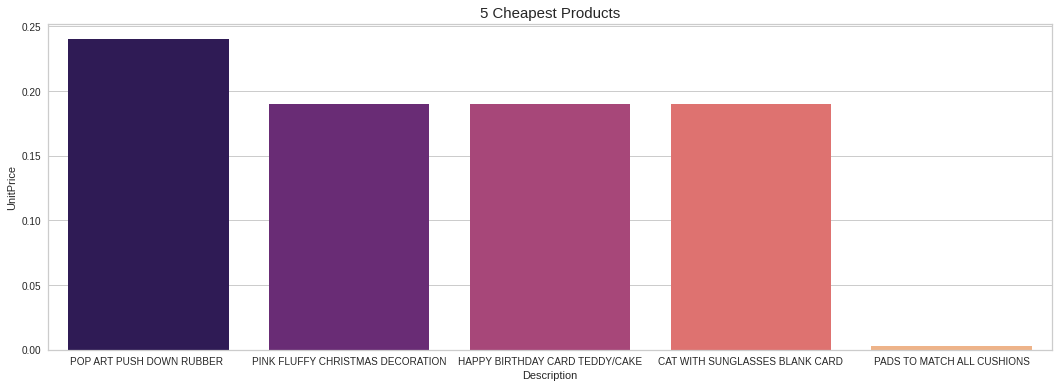

In [32]:
#plotting bottom 5
plt.figure(figsize=(18,6))
plt.title('5 Cheapest Products', fontsize=15)
sns.barplot(data = prod_price[-5:], x='Description', y='UnitPrice',palette ='magma')

Manual is the costliest product and PADS TO MATCH ALL CUSHIONS is the cheapest product

***Top and Bottom Products (Based on Total Revenue)***

---



In [33]:
#Creating a dataframe that gives the product names and their total revenue
prod_rev=retail_data.groupby('Description').sum()['TotalAmount'].reset_index().sort_values('TotalAmount',ascending=False)

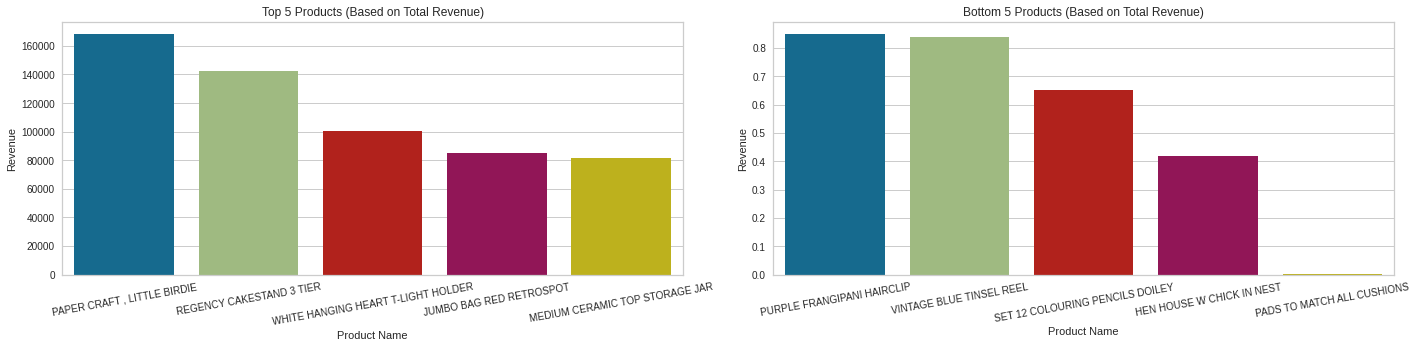

In [52]:
#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='TotalAmount',data = prod_rev[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='TotalAmount',data = prod_rev[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')
plt.tight_layout()

PAPER CRAFT LITTLE BIRDIE makes the most revenue.

***Transactions w.r.t Date and Time***

---



In [64]:
# Finding Per Day Transaction
per_day=retail_data['Day'].value_counts().reset_index()
per_day.rename(columns = {'index' : 'Day_name'}, inplace = True)
per_day.rename(columns = {'Day' : 'Count'}, inplace = True)
per_day

,Day_name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


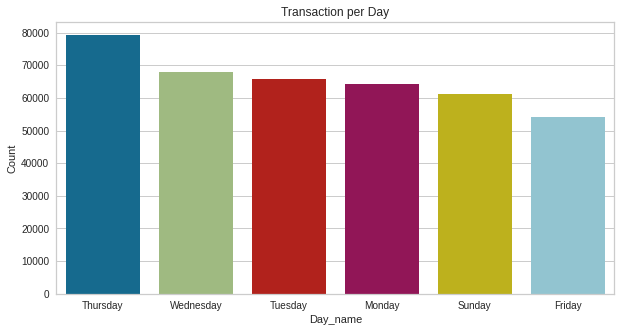

In [71]:
# Bar Plot Per Day Transaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per Day')
sns.barplot(x='Day_name',y='Count',data=per_day)

In [66]:
# Finding Per month Transaction
per_month=retail_data['Month'].value_counts().reset_index()
per_month.rename(columns = {'index' : 'Month_name'}, inplace = True)
per_month.rename(columns = {'Month' : 'Count'}, inplace = True)
per_month

,Month_name,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


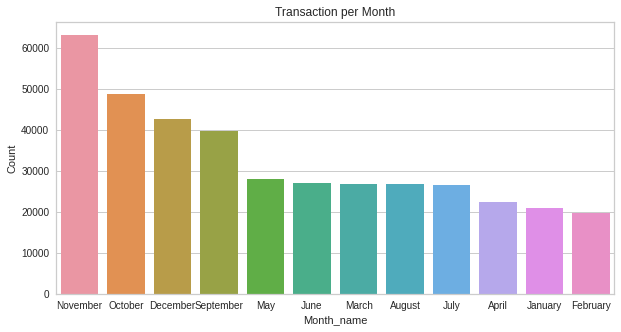

In [70]:
# Bar Plot Per month Transaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per Month')
sns.barplot(x='Month_name',y='Count',data=per_month)

In [72]:
# Finding Per hour Transaction
per_hour=retail_data['Hour'].value_counts().reset_index()
per_hour.rename(columns = {'index' : 'hour'}, inplace = True)
per_hour.rename(columns = {'Hour' : 'Count'}, inplace = True)
per_hour

,hour,Count
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793
5,10,37775
6,16,23719
7,9,21928
8,17,12942
9,8,8688


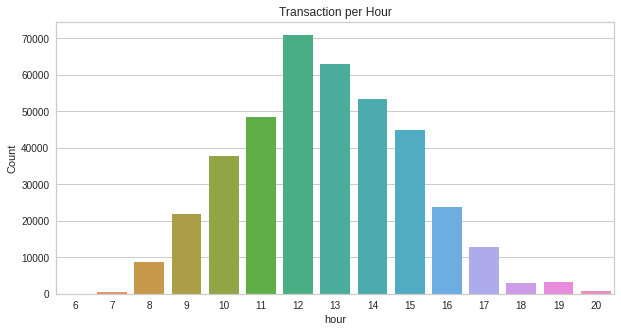

In [75]:
# Bar Plot Per hourTransaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per Hour')
sns.barplot(x='hour',y='Count',data=per_hour)

In [76]:
# Finding Per day part Transaction
day_part=retail_data['DayPart'].value_counts().reset_index()
day_part.rename(columns = {'index' : 'Part'}, inplace = True)
day_part.rename(columns = {'DayPart' : 'Count'}, inplace = True)
day_part

,Part,Count
0,Afternoon,268680
1,Morning,117144
2,Evening,6908


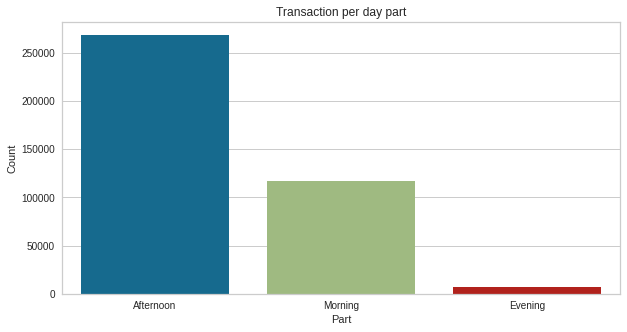

In [78]:
# Bar Plot Per hourTransaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per day part')
sns.barplot(x='Part',y='Count',data=day_part)

November is the busiest month, followed by October and December.

Thursday is the busiest day of the week.

12 pm is the peak hour of transactions.

Most orders are placed in the afternoon.